In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Data import ExperimentData, AntData
from os import sep as sep
import AnalysisFunctions as afuns
from functools import reduce
import os
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
root_path = r'Y:\Lior&Einav\Experiments'
exp_details = pd.read_excel(root_path + sep + 'Experiments_details.xlsx', engine='openpyxl')

In [3]:
def get_bdata_filename(exp_path):
    bdata_filename = [filename for filename in os.listdir(exp_path+sep+r'with food\blob analysis normalized by white paper') 
                        if filename.startswith(r'bdata')][0]
    return bdata_filename

In [50]:
exp_num = 11
exp_idx, PC_ratios_dict, exp_path = afuns.get_exp_data(exp_num, exp_details, root_path)
bdata_filename = get_bdata_filename(exp_path)

bdata = pd.read_csv(exp_path + sep + r'with food\blob analysis normalized by white paper' + sep + bdata_filename, index_col=0)
fdata = pd.read_csv(exp_path + sep + r'forager_table_with_feeding_sizes_ul_transparency_corrected.csv', index_col=[0])
tdata = pd.read_csv(exp_path + sep + r'clean_trophallaxis_table_transparency_corrected.csv')
ants = pd.read_csv(exp_path + sep + r'ants_list.csv')

In [51]:
foragers = [ant['ant_id'] for idx, ant in ants.iterrows() if ant['is_forager']]
foragers

[150, 170, 180, 233, 289, 392, 421, 445, 540, 61, 66, 113, 148, 82, 76]

In [6]:
def calc_vel(x,y,dt):
    diff_x = x.diff(periods=dt)
    diff_y = y.diff(periods=dt)
    v = np.sqrt(diff_x**2 + diff_y**2)/dt
    return v

In [7]:
def plot_event(start_frame, end_frame, color, alpha):
    plt.axvspan(start_frame, end_frame, facecolor=color, alpha=alpha, zorder=-100)

In [8]:
def get_ant_data(ant, bdata, tdata, fdata=False):
    ant_data={}
    
    raw_x = bdata['a'+str(ant)+'-x']
    raw_y = bdata['a'+str(ant)+'-y']
    ant_data['x']=raw_x.interpolate(method='linear',limit_area='inside')
    ant_data['y']=raw_y.interpolate(method='linear',limit_area='inside')
    
    ant_data['interactions']=tdata[(tdata['giver']==ant) | (tdata['receiver']==ant)]
    
    if isinstance(fdata, pd.DataFrame):
        ant_data['feedings'] = fdata[fdata.ant_id==ant]
    
    return ant_data
    

In [9]:
def plot_velocity_timeline(ant, ant_data, dt=1, show_events=False):
    v = calc_vel(ant_data['x'],ant_data['y'],dt)
    fig = plt.figure(figsize=[18, 4])
    plt.plot(v)
    
    if show_events:
        # feedings
        if 'feedings' in ant_data.keys():
            for idx, event in ant_data['feedings'].iterrows():
                plot_event(event['feeding_start'], event['feeding_end'],event['food_source'], 0.3)

        # trophallaxis
        for idx, event in ant_data['interactions'].iterrows():
            plot_event(event['start_frame'], event['end_frame'],'0.5', 0.2)
    
    # format figure
    plt.xlabel('frame')
    plt.ylabel('velocity')
    plt.title(ant)
    plt.xlim([0, len(v)])
                      
    return fig

In [10]:
# ant_data=get_ant_data(148, bdata, tdata, fdata)

In [11]:
# fig = plot_velocity_timeline(148, ant_data, dt=10, show_events=True)

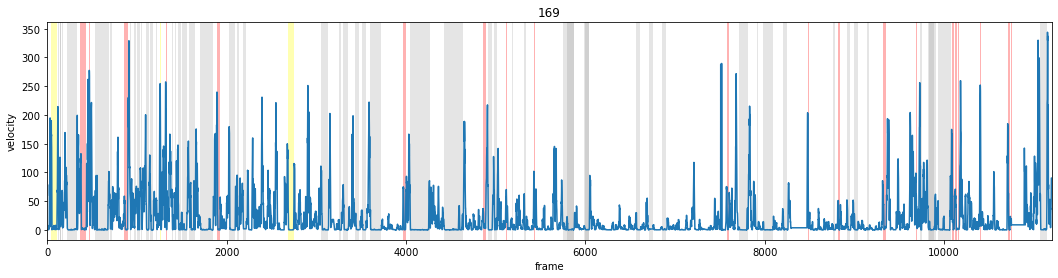

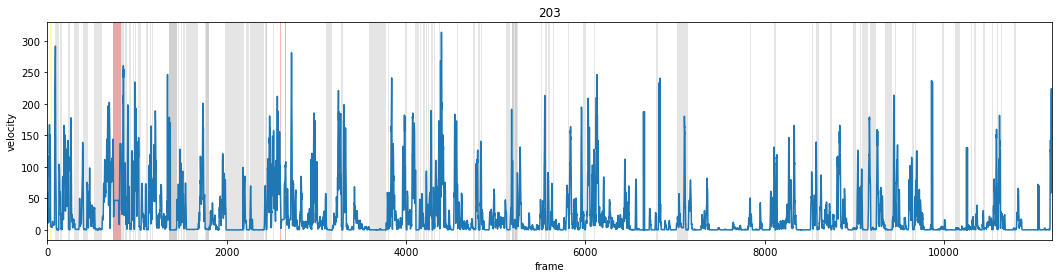

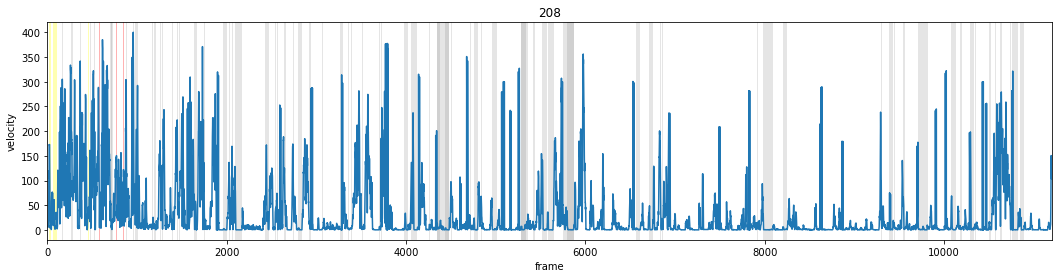

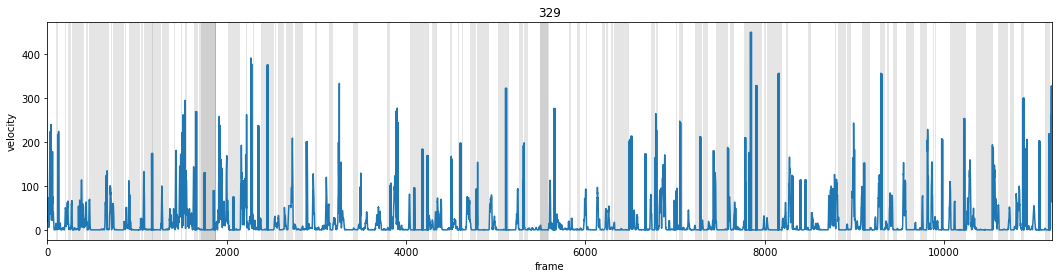

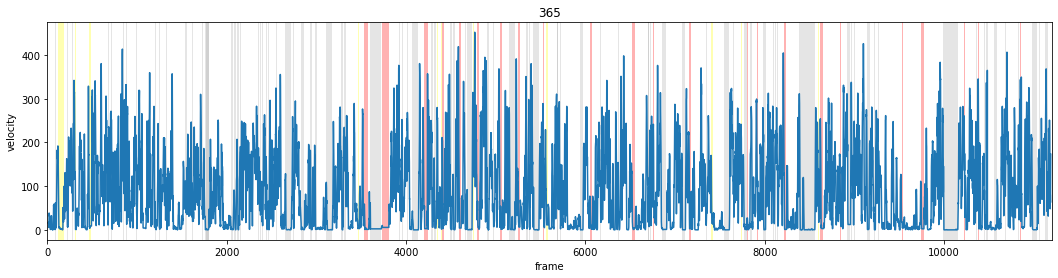

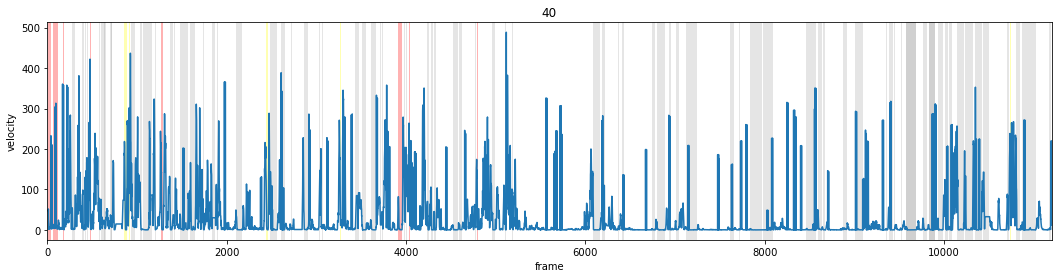

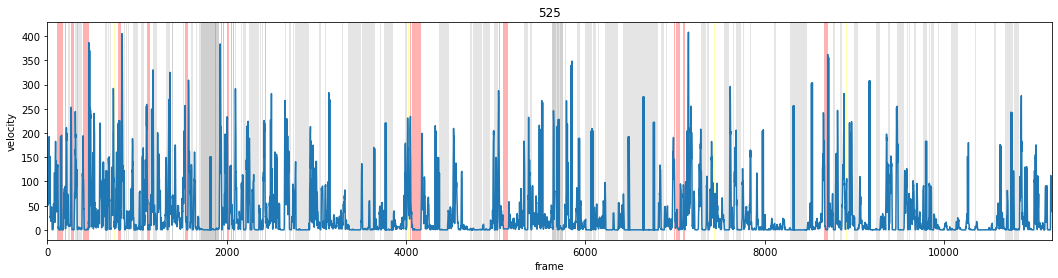

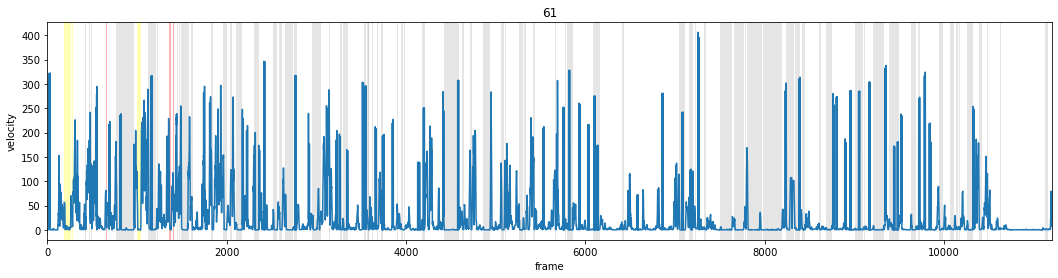

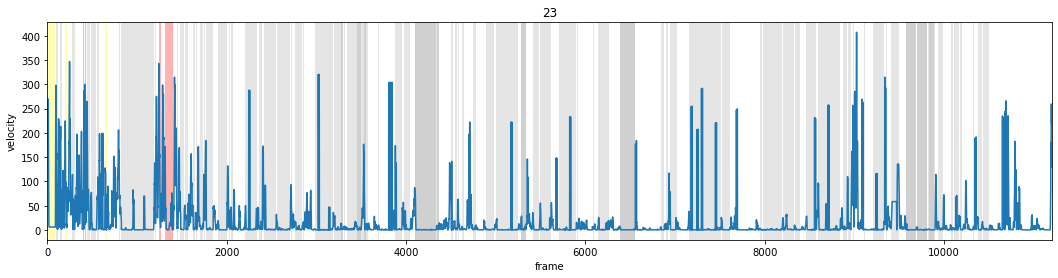

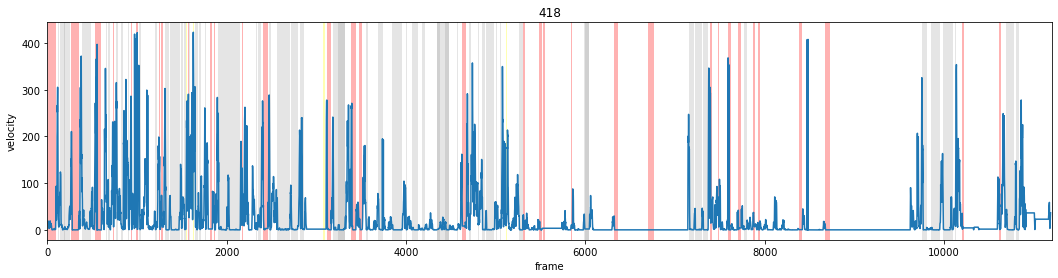

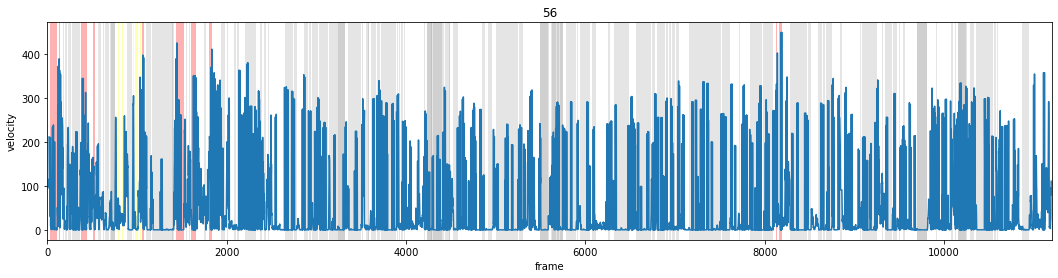

In [12]:
pdf = PdfPages(exp_path + sep + 'velocity_timelines.pdf')
for ant in foragers:
    ant_data=get_ant_data(ant, bdata, tdata, fdata)
    fig = plot_velocity_timeline(ant, ant_data, dt=10, show_events=True)
    pdf.savefig(fig)
pdf.close()

In [52]:
all_v=[]
for ant in foragers:
    ant_data=get_ant_data(ant, bdata, tdata, fdata)
    v = calc_vel(ant_data['x'],ant_data['y'],dt=10)
    all_v.extend(list(v))

In [53]:
plt.hist(all_v,100)

C:\Users\liorba\Anaconda3\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\liorba\Anaconda3\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8.0285e+04, 9.8580e+03, 6.1670e+03, 4.4310e+03, 3.5320e+03,
        3.0330e+03, 2.5100e+03, 2.3670e+03, 1.9310e+03, 1.9260e+03,
        1.7940e+03, 1.5370e+03, 1.4410e+03, 1.4690e+03, 1.3570e+03,
        1.2660e+03, 1.2010e+03, 1.1000e+03, 1.1040e+03, 9.0700e+02,
        9.5600e+02, 8.3000e+02, 7.4700e+02, 7.8500e+02, 6.9700e+02,
        6.9800e+02, 6.9500e+02, 6.3000e+02, 7.0900e+02, 6.2300e+02,
        6.0200e+02, 6.1600e+02, 5.6600e+02, 5.0600e+02, 5.5400e+02,
        4.9000e+02, 4.9600e+02, 4.7400e+02, 4.1600e+02, 4.0400e+02,
        3.8600e+02, 4.0300e+02, 3.5400e+02, 3.6400e+02, 3.4700e+02,
        3.2600e+02, 2.9300e+02, 2.6100e+02, 2.6800e+02, 2.6700e+02,
        2.0100e+02, 2.1800e+02, 2.1000e+02, 1.7700e+02, 1.7200e+02,
        1.6400e+02, 1.5200e+02, 1.3700e+02, 1.1700e+02, 1.0400e+02,
        8.5000e+01, 9.3000e+01, 6.5000e+01, 6.3000e+01, 6.2000e+01,
        7.2000e+01, 7.0000e+01, 5.9000e+01, 5.0000e+01, 3.5000e+01,
        2.9000e+01, 2.9000e+01, 2.7000e+01, 2.00

In [57]:
%matplotlib qt
fig = plot_velocity_timeline(ant, ant_data, dt=5, show_events=True)
# plt.plot(v)
plt.plot(900*(v>50),'.')